In [62]:
import numpy as pd
import pandas as pd 

In [63]:
df =pd.read_csv('collegePlace.csv',index_col = False )

In [64]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [65]:
df =df.iloc[:, [3, 4, 7]]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0    Internships  2966 non-null   int64
 1    CGPA         2966 non-null   int64
 2    PlacedOrNot  2966 non-null   int64
dtypes: int64(3)
memory usage: 69.6 KB


In [67]:
import matplotlib.pyplot as plt

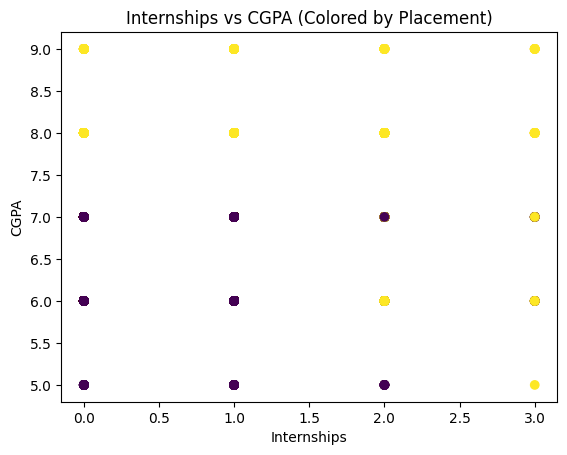

In [68]:
plt.scatter(df[' Internships'], df[' CGPA'], c=df[' PlacedOrNot'])
plt.xlabel('Internships')
plt.ylabel('CGPA')
plt.title('Internships vs CGPA (Colored by Placement)')
plt.show()

In [69]:
X= df.iloc[:,0:2]
y = df.iloc[:,-1]

In [70]:
X

,Internships,CGPA
0,1,8
1,0,7
2,1,6
3,0,8
4,0,8
...,...,...
2961,0,7
2962,1,7
2963,1,7
2964,1,7


In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name:  PlacedOrNot, Length: 2966, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)


(2966, 2)
(2966,)
(2372, 2)
(2372,)


In [74]:
X_train

,Internships,CGPA
2458,1,8
509,0,7
1370,0,7
1352,1,7
1779,1,8
...,...,...
1638,3,8
1095,1,6
1130,1,8
1294,0,7


In [75]:
y_train

2458    1
509     0
1370    0
1352    1
1779    1
       ..
1638    1
1095    0
1130    1
1294    0
860     0
Name:  PlacedOrNot, Length: 2372, dtype: int64

In [76]:
X_test

,Internships,CGPA
2395,0,7
794,2,8
1894,1,8
332,0,7
2023,1,7
...,...,...
1938,1,8
2607,0,8
1395,0,7
602,2,7


In [77]:
y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name:  PlacedOrNot, Length: 594, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc =StandardScaler()

In [80]:
X_train= sc.fit_transform(X_train)

In [81]:
X_train

array([[ 0.41738234,  0.94312179],
       [-0.94255024, -0.09835162],
       [-0.94255024, -0.09835162],
       ...,
       [ 0.41738234,  0.94312179],
       [-0.94255024, -0.09835162],
       [ 0.41738234, -0.09835162]], shape=(2372, 2))

In [82]:
X_test = sc.transform(X_test)

In [83]:
X_test

array([[-0.94255024, -0.09835162],
       [ 1.77731492,  0.94312179],
       [ 0.41738234,  0.94312179],
       ...,
       [-0.94255024, -0.09835162],
       [ 1.77731492, -0.09835162],
       [ 0.41738234, -0.09835162]], shape=(594, 2))

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr =LogisticRegression()


In [86]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))
print(X_train.head() if hasattr(X_train, 'head') else X_train[:5])
print(y_train.head() if hasattr(y_train, 'head') else y_train[:5])


(2372, 2)
(2372,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[[ 0.41738234  0.94312179]
 [-0.94255024 -0.09835162]
 [-0.94255024 -0.09835162]
 [ 0.41738234 -0.09835162]
 [ 0.41738234  0.94312179]]
2458    1
509     0
1370    0
1352    1
1779    1
Name:  PlacedOrNot, dtype: int64


In [87]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
y_pred =lr.predict(X_test)

In [89]:
y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name:  PlacedOrNot, Length: 594, dtype: int64

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,y_pred)

0.734006734006734

In [92]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

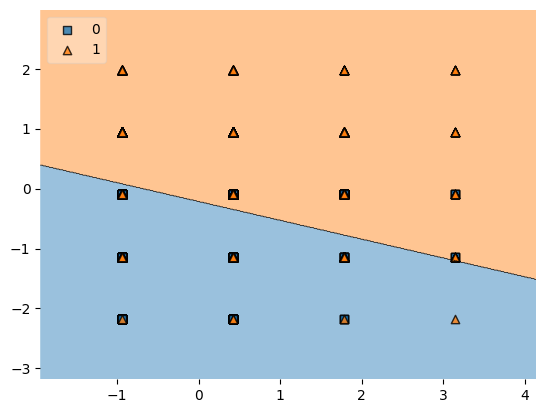

In [93]:
plot_decision_regions(X_train, y_train.values, clf=lr, legend=2)

In [94]:
import pickle

In [95]:
pickle.dump(lr,open('model2005.pkl','wb'))